# **Yulu Bikes Project**

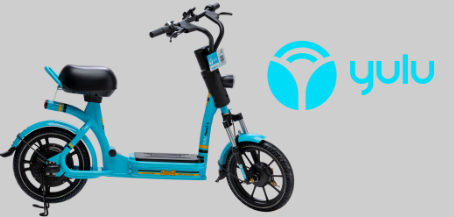

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bike_sharing.csv?1642089089")

In [ ]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## **Checking the structure & characteristics of the dataset**

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df = df.astype({"datetime":'datetime64[ns]'}) ## Converted object datatype to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isna().sum() # No missing values good to go

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## **Univariate Analysis**

In [ ]:
df['season'].value_counts() # On each season count of renting cycles is almost same.

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

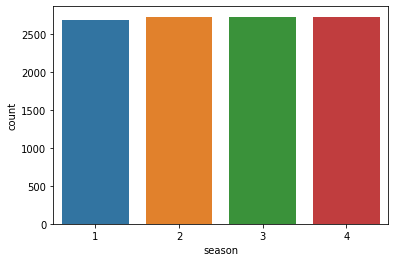

In [ ]:
sns.countplot(data=df,x="season") # Usage of cycle in all 4 session(1: spring, 2: summer, 3: fall, 4: winter) is almost same.
plt.show()                         # Visual represntation

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

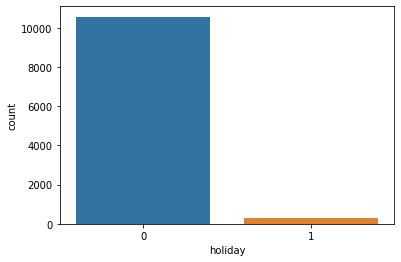

In [ ]:
sns.countplot(data=df,x="holiday") # day is not a holiday count is very mush higher than day is a holiday
plt.show()                         # renting of yulu cycles on day not a holiday is much more

In [ ]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

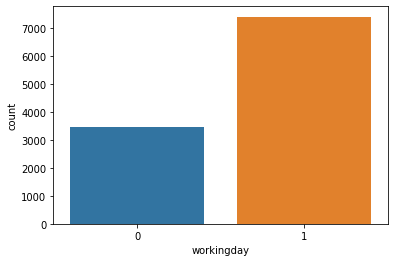

In [ ]:
sns.countplot(data=df,x="workingday") #Day is neither weekend nor holiday is 1.
plt.show()                            #Day is holiday
                                      # Usage of yulu electric cycles on working day is more than holidays including weekends

In [ ]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

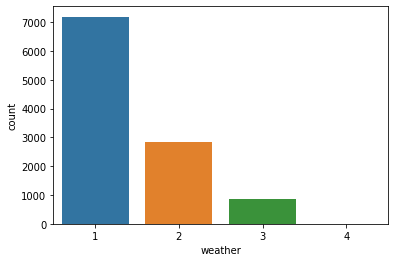

In [ ]:
sns.countplot(data=df,x="weather") # 1: Clear, Few clouds, partly cloudy, partly cloudy
plt.show()                         # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                   # 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                   # 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                                   # weather 1 & 2 has maximus usage of yulu cycles as compaire to weather 3 & 4.

In [ ]:
df["temp"].value_counts(bins=5)#Maximum usage of bike is under temp 8.85 to 32.96 (temperature in Celsius)

(16.892, 24.928]    3340
(8.856, 16.892]     3331
(24.928, 32.964]    3095
(0.779, 8.856]       717
(32.964, 41.0]       403
Name: temp, dtype: int64

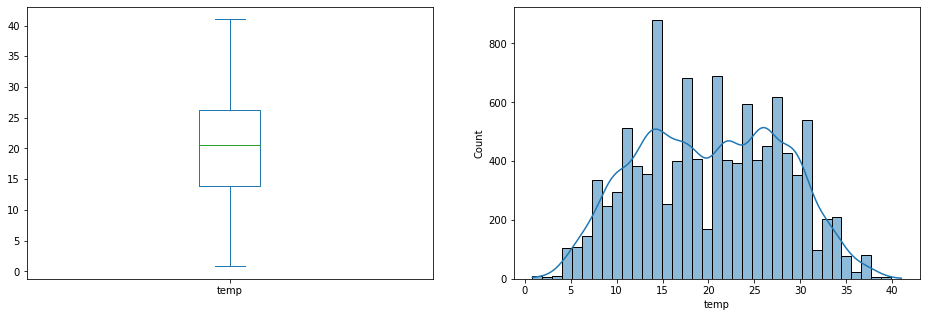

In [ ]:
plt.subplot(121)
df["temp"].plot.box(figsize=(16,5))    # Median is at 20.50 celsius
plt.subplot(122)                       # temp is not normaly distributed
sns.histplot(df["temp"], kde=True)
plt.show()


In [ ]:
df["atemp"].value_counts(bins=5) #Maximum usage of bike is under temp 18.64 to 36.52(feeling temperature in Celsius)

(18.638, 27.577]    3752
(27.577, 36.516]    3257
(9.699, 18.638]     2922
(36.516, 45.455]     505
(0.714, 9.699]       450
Name: atemp, dtype: int64

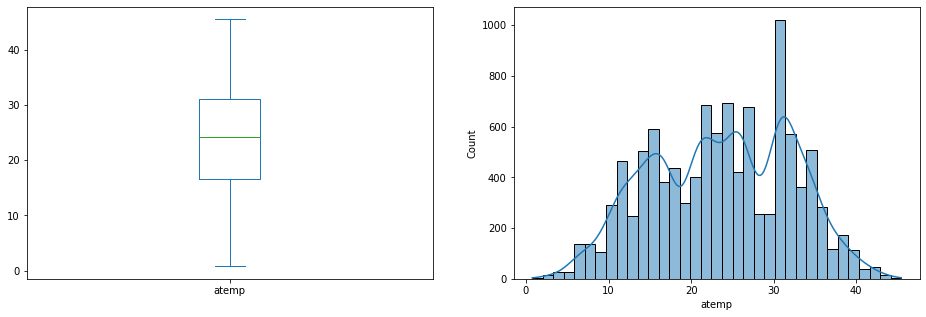

In [ ]:
plt.subplot(121)
df["atemp"].plot.box(figsize=(16,5))    # Median is at 24.24 feeling temp in celsius
plt.subplot(122)                       # atemp is not normaly distributed
sns.histplot(df["atemp"], kde=True)
plt.show()


In [ ]:
df["humidity"].value_counts(bins=5) # Maximum renting of cycles is under the humidity between 40 to 60

(40.0, 60.0]      3564
(60.0, 80.0]      3382
(80.0, 100.0]     2302
(20.0, 40.0]      1560
(-0.101, 20.0]      78
Name: humidity, dtype: int64

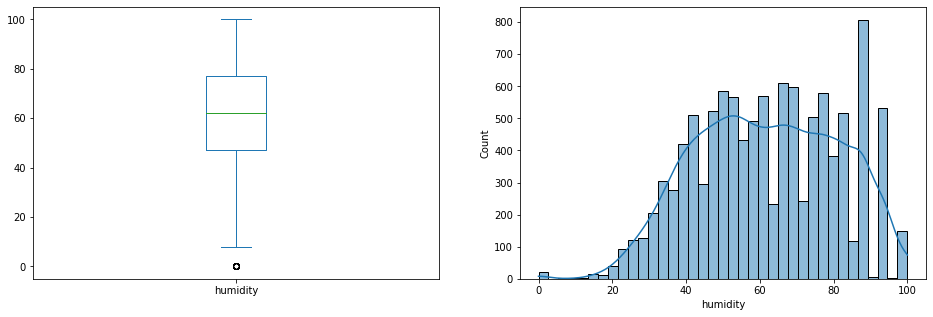

In [ ]:
plt.subplot(121)
df["humidity"].plot.box(figsize=(16,5))    # Median of humidity is 62
plt.subplot(122)                           # humidity is normaly distributed
sns.histplot(df["humidity"], kde=True)
plt.show()


In [ ]:
df["windspeed"].value_counts(bins=5) # maximum renting of cycles done under the wind speed  of range -0.058 to 22.799

(-0.058, 11.399]    5396
(11.399, 22.799]    4367
(22.799, 34.198]     976
(34.198, 45.598]     138
(45.598, 56.997]       9
Name: windspeed, dtype: int64

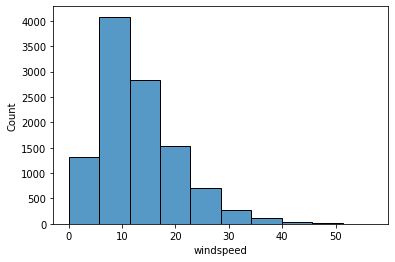

In [ ]:
sns.histplot(df["windspeed"],bins=10) # at 0 to 10 wind speed maximum yulu cycles will get rent.
plt.show()

In [ ]:
df["casual"].value_counts(bins=10) # maximum casual usage of bike is under the range 0 to 73 bikes

(-0.368, 36.7]    7447
(36.7, 73.4]      1807
(73.4, 110.1]      805
(110.1, 146.8]     322
(146.8, 183.5]     203
(183.5, 220.2]     127
(220.2, 256.9]      98
(256.9, 293.6]      48
(293.6, 330.3]      18
(330.3, 367.0]      11
Name: casual, dtype: int64

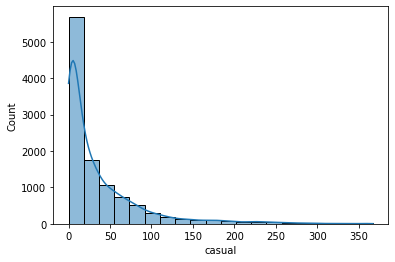

In [ ]:
sns.histplot(df["casual"],bins=20,kde=True) # casual gives us right skewed distribution
plt.show()

In [ ]:
df["registered"].value_counts(bins=10)# maximum registered usage of cycles are under the range 0 to 88 bikes

(-0.887, 88.6]    4459
(88.6, 177.2]     2694
(177.2, 265.8]    1775
(265.8, 354.4]     873
(354.4, 443.0]     463
(443.0, 531.6]     260
(531.6, 620.2]     142
(620.2, 708.8]     126
(708.8, 797.4]      81
(797.4, 886.0]      13
Name: registered, dtype: int64

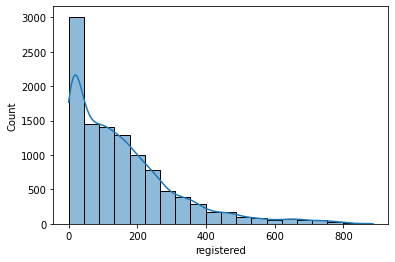

In [ ]:
sns.histplot(df["registered"],bins=20,kde=True) # registered bike counts gives us right skewed distribution
plt.show()                                      # outliers are there on right hand side

In [ ]:
df["count"].value_counts(bins=10) # Maximum registered yulu bike counts usage range is between 0 to 196

(0.023, 98.6]     4284
(98.6, 196.2]     2337
(196.2, 293.8]    1686
(293.8, 391.4]    1067
(391.4, 489.0]     640
(489.0, 586.6]     419
(586.6, 684.2]     233
(684.2, 781.8]     116
(781.8, 879.4]      85
(879.4, 977.0]      19
Name: count, dtype: int64

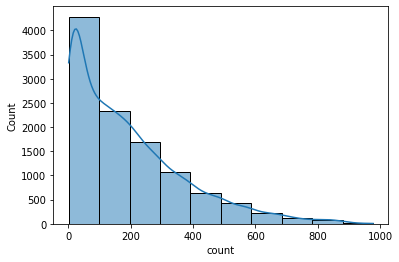

In [ ]:
sns.histplot(df["count"],bins=10,kde=True) # total bike counts gives us right skewed distribution
plt.show()

## **Bivariate Analysis**

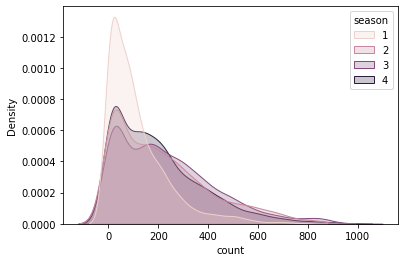

In [ ]:
sns.kdeplot(x="count",data=df,hue="season",color='green',shade=True) # Maximum count of bikes use during season 1 condition.
                                                                    # Under season 2,3 and 4 usage of bike is almost same

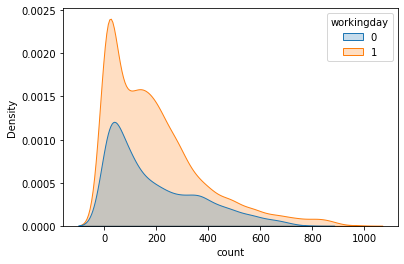

In [ ]:
sns.kdeplot(x="count",data=df,hue="workingday",color='green',shade=True) # bike use on workingday is more.

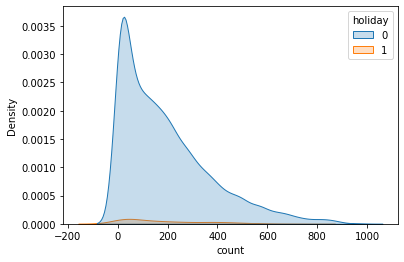

In [ ]:
sns.kdeplot(x="count",data=df,hue="holiday",color='green',shade=True) # usage of bike on 0 which is nonholiday is more.

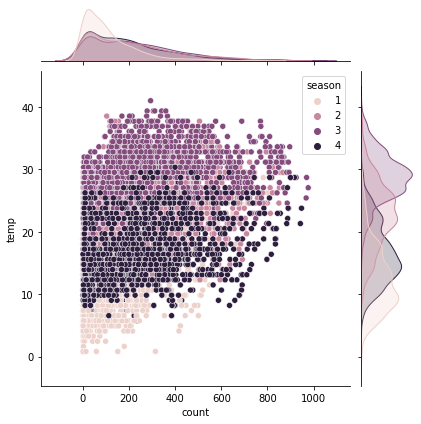

In [ ]:
sns.jointplot(x="count",y="temp",data=df,hue="season") # this graph gives us bike usage count under team and season parameter

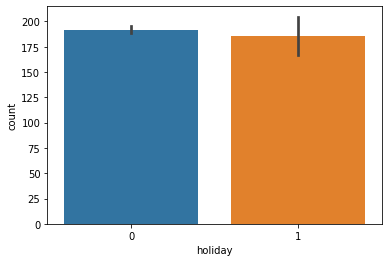

In [ ]:
sns.barplot(x="holiday",y="count",data=df,estimator=np.mean) # usage of bike on holidays and not holidays is almost same

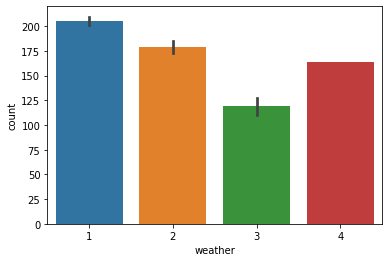

In [ ]:
sns.barplot(x="weather",y="count",data=df,estimator=np.mean) # cycles on rented mean count under different weather is represent in this graph.

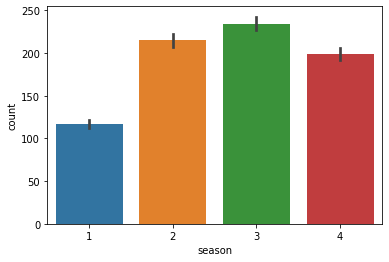

In [ ]:
sns.barplot(x="season",y="count",data=df,estimator=np.mean) # Maximum cycles rented under season 2 and 3 so company can provide service accordingly

## **Detected Outliers And Removing it from dataframe**

In [ ]:
df.describe() #The difference between mean and median is much heigher in count columns hence finding out the outlier by using IQR technique and removing it.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


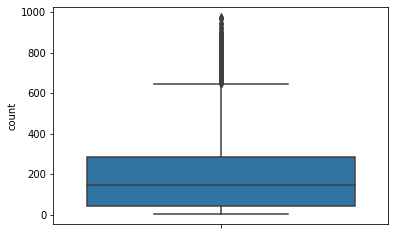

In [ ]:
sns.boxplot(y="count",data=df) # count has outlier but we will retain because we want to do analysis on complete data.
                               #removal of outlier may be cause the data loss that's why we are retaining it

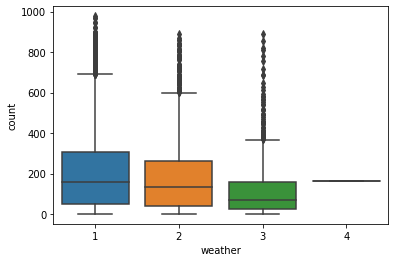

In [ ]:
sns.boxplot(x='weather', y='count', data=df)

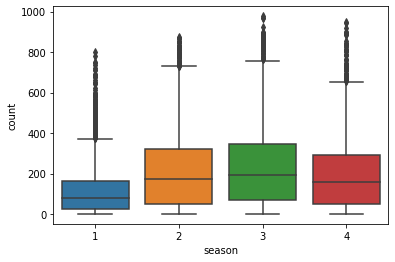

In [ ]:
sns.boxplot(x='season', y='count', data=df) # each season has outliers we are retaing this in order to avoid the data loss.

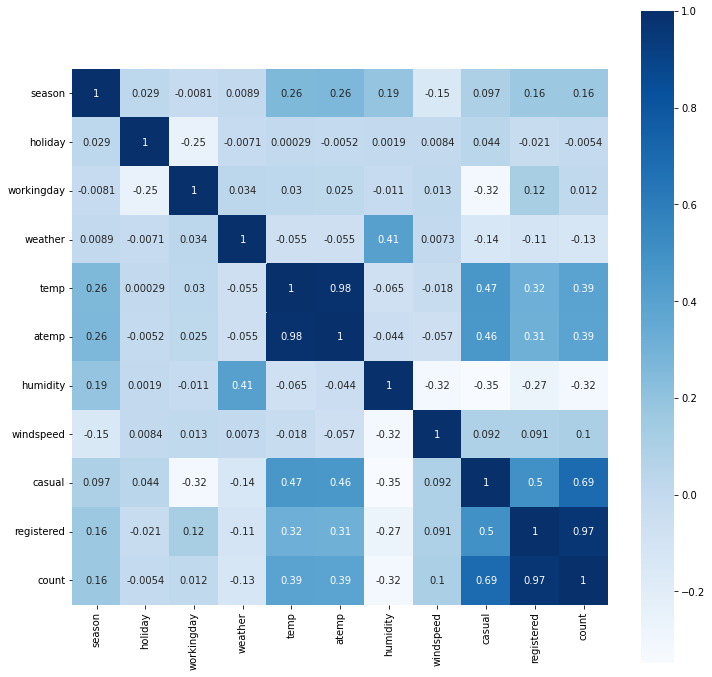

In [ ]:
plt.figure(figsize=(12, 12))                                                   # register and count is positively correlated with each other
sns.heatmap(df.corr(method='pearson'), square=True,annot=True, cmap="Blues")   # temp and atemp also correlated with each other

### **Cheking working Day has effect on number of electric cycles rented (ttest)**

In [ ]:
from scipy.stats import norm, ttest_1samp
from statsmodels.stats.weightstats import ztest

In [ ]:
df.groupby(["workingday"])["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [ ]:
mu=df["count"].mean()
mu.round(2)

191.57

In [ ]:
sigma=df["count"].std()
sigma.round()

181.0

In [ ]:
workingday = df[df["workingday"]==1][["count"]]

In [ ]:
data = workingday
z_stat = (data.mean() - mu) / (sigma / np.sqrt(len(data)))
z_stat

count    0.683319
dtype: float64

In [ ]:
p_value = 1 - norm.cdf(z_stat)
print(p_value)

[0.24720277]


In [ ]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.0 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58663 sha256=b996eaf113ab117d4c0393a7bcf6923ad925a8328d4d28a7732117e1353009b1
  Stored in directory: /root/.cache/pip/wheels/81/e6/c8/a378f0c300eba657e42ae0df674e32e6d434d96a7eb765b067
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=9ed0666be531fbce55c0dd5e03e24c59619a8792cbeba024e4cb375a092332af
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat

In [ ]:
ztest_result = stat()
ztest_result.ztest(df=workingday, x="count", x_std=sigma, mu=mu, test_type=1)

In [ ]:
print(ztest_result.summary)


One Sample Z-test 

------------------  -----------
Sample size         7412
Mean                 193.012
Z value                0.683319
p value (one-tail)     0.247203
p value (two-tail)     0.494406
Lower 95.0%          188.888
Upper 95.0%          197.136
------------------  -----------


### **H0 : Working Day has no effect on number of electric cycles rented**
### **H1 : Working Day has effect on number of electric cycles rented**

In [ ]:
# comapring the mean of overall count with the mean of workingday rented cycles
# H0: mu =191.57
# H1: mu >191.57
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject the H0")
    print("No difference between workingday and overall rented cycles mean.")
    print("Which means the value which comes i.e. 193.01 is stastically insignificant that could have been chance.")
    print("So there is no significant difference of rented cycles between workingdays and not workingdays.")


Fail to reject the H0
No difference between workingday and overall rented cycles mean.
Which means the value which comes i.e. 193.01 is stastically insignificant that could have been chance.
So there is no significant difference of rented cycles between workingdays and not workingdays.


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
a = df[df["workingday"]== 1]["count"]
b = df[df["workingday"]== 0]["count"]

In [ ]:
# H0: workingday and count are independent (equal mean)
ttest_ind(a, b)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

## **No. of cycles rented similar or different in different seasons (ANOVA)**

In [ ]:
from scipy.stats import f_oneway # numerical vs categorical

In [ ]:
season_1 = df[df["season"]==1]["count"]
season_2 = df[df["season"]==2]["count"]
season_3 = df[df["season"]==3]["count"]
season_4 = df[df["season"]==4]["count"]

### **H0: All no. of cycles rented similar in different seasons**

### **H1: All no. of cycles rented different in different seasons**

In [ ]:
# H0: all number of cycles rented similar in different seasons
f_stat,p_value=f_oneway(season_1,season_2,season_3,season_4)
print(f_stat,p_value)

236.94671081032106 6.164843386499654e-149


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject H0")
    print("Hence we can say from the given data all no. of cycles rented different in different seasons")
else:
    print("Fail to reject the H0")
    print("Hence we can say from the given data all no. of cycles rented similar in different seasons")

Reject H0
Hence we can say from the given data all no. of cycles rented different in different seasons


## **No. of cycles rented similar or different in different weather(ANOVA)**

In [ ]:
weather_1 = df[df["weather"]==1]["count"]
weather_2 = df[df["weather"]==2]["count"]
weather_3 = df[df["weather"]==3]["count"]
weather_4 = df[df["weather"]==4]["count"]

### **H0: All no. of cycles rented similar in different weather**

### **H1: All no. of cycles rented different in different weather**

In [ ]:
# H0: all number of cycles rented similar in different weather
f_stat,p_value=f_oneway(weather_1,weather_2,weather_3,weather_4)
print(f_stat,p_value)

65.53024112793271 5.482069475935669e-42


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject H0")
    print("Hence we can say from the given data all no. of cycles rented different in different weather")
else:
    print("Fail to reject the H0")
    print("Hence we can say from the given data all no. of cycles rented similar in different weather")

Reject H0
Hence we can say from the given data all no. of cycles rented different in different weather


## **Weather is dependent on season (check between 2 predictor variable) (chi_square test)**

In [ ]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

## **H0 : Weather not depend on season**

## **H1 : Weather is depend on season**

In [ ]:
from scipy.stats import chisquare, chi2_contingency # categorical features

In [ ]:
chi_stat, p_value = chisquare(
    [2686,2733,2733,2734],
    [1,859,2834,7192]
)
print(chi_stat, p_value)

7216080.245473384 0.0


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject the null hypothesis H0")
    print("Weather is depend on season")
else:
  print("fail to reject the null hypothesis H0")
  print("Weather is not depend on season")

Reject the null hypothesis H0
Weather is depend on season


## **2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

In [ ]:
workingday=df.loc[df["workingday"]==1]
workingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
47,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30


In [ ]:
len(workingday)

7412

In [ ]:
nonworkingday=df.loc[df["workingday"]==0]
nonworkingday.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
len(nonworkingday)

3474

In [ ]:
workingday["count"].mean() #mean1

193.01187263896384

In [ ]:
nonworkingday["count"].mean() #mean2

188.50662061024755

In [ ]:
# H0: mean1 equal to mean2 (both counts for workingday and nonworkingday are same)
# Ha: mean1 not equal to mean2
ttest_ind(workingday["count"], nonworkingday["count"])

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

### **In above code p_value is 0.22 which is greater than 0.05 hence we fail to reject the null hypothesis which means mean1 is equal to mean2 which means data given is stastically insignificant**

In [ ]:
# H0: mean1 = mean2 (both counts for workingday and nonworkingday are same)
# Ha: mean1 < mmean2
ttest_ind(workingday["count"], nonworkingday["count"], alternative="less") # left tailed

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.8867759788681933)

### **In above code p_value is 0.89 which is greater than 0.05 hence we fail to reject the null hypothesis which means mean1 is equal to mean2 which means data given is stastically insignificant**

In [ ]:
# H0: mean1 = mean2 (both counts for workingday and nonworkingday are same)
# Ha: mean1 > mmean2
ttest_ind(workingday["count"], nonworkingday["count"], alternative="greater") # right tailed

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.11322402113180674)

### **In above code p_value is 0.11 which is greater than 0.05 hence we fail to reject the null hypothesis which means mean1 is equal to mean2 which means data given is stastically insignificant**

# **Some more illustrate the insights based on EDA**

In [ ]:
df["count"].value_counts(bins=10) # Maximum number of cycles rented are in range 0-98 so company has to ready with more than 100 cycles ready

(0.023, 98.6]     4284
(98.6, 196.2]     2337
(196.2, 293.8]    1686
(293.8, 391.4]    1067
(391.4, 489.0]     640
(489.0, 586.6]     419
(586.6, 684.2]     233
(684.2, 781.8]     116
(781.8, 879.4]      85
(879.4, 977.0]      19
Name: count, dtype: int64

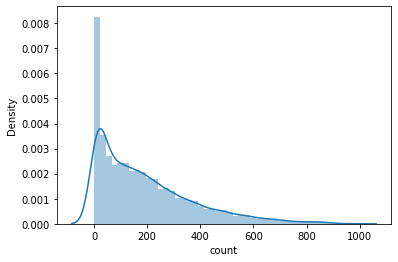

In [ ]:
sns.distplot(df["count"]) # visual representation of above vaue_counts explaination

In [ ]:
df["casual"].value_counts(bins=10) # Casual booking for cycles are maximum under the range of 0 to 73

(-0.368, 36.7]    7447
(36.7, 73.4]      1807
(73.4, 110.1]      805
(110.1, 146.8]     322
(146.8, 183.5]     203
(183.5, 220.2]     127
(220.2, 256.9]      98
(256.9, 293.6]      48
(293.6, 330.3]      18
(330.3, 367.0]      11
Name: casual, dtype: int64

In [ ]:
df["registered"].value_counts(bins=10) # Registered booking for cycles are maximum under the range of 0 to 88

(-0.887, 88.6]    4459
(88.6, 177.2]     2694
(177.2, 265.8]    1775
(265.8, 354.4]     873
(354.4, 443.0]     463
(443.0, 531.6]     260
(531.6, 620.2]     142
(620.2, 708.8]     126
(708.8, 797.4]      81
(797.4, 886.0]      13
Name: registered, dtype: int64

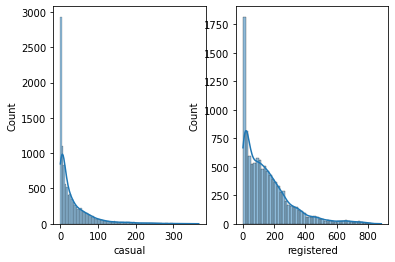

In [ ]:
plt.subplot(121)
sns.histplot(df["casual"], kde=True)  # Visual representation of above value_counts
plt.subplot(122)
sns.histplot(df["registered"], kde=True)
plt.show()

In [ ]:
pd.crosstab(index=df["season"],columns=df["holiday"],margins=True,normalize=True)*100
# This crosstab tell us that maximum cycles were rent on not a holiday

holiday,0,1,All
season,,,
1,24.021679,0.652214,24.673893
2,24.664707,0.440933,25.105640
3,24.223774,0.881867,25.105640
4,24.232960,0.881867,25.114826
All,97.143120,2.856880,100.000000


In [ ]:
pd.crosstab(index=df["season"],columns=df["workingday"],margins=True,normalize=True)*100
# This crosstab tell us that maximum cycles were rent on workingdays excepts weekends and holidays

workingday,0,1,All
season,,,
1,7.881683,16.792210,24.673893
2,7.716333,17.389307,25.105640
3,8.157266,16.948374,25.105640
4,8.157266,16.957560,25.114826
All,31.912548,68.087452,100.000000


In [ ]:
pd.crosstab(index=df["weather"],columns=df["season"],margins=True,normalize=True)*100
# This crosstab tell us that season has almost same impact on renting the cycles in different season.
# and weather gives us different impact of renting cycles in different weather conditions.

season,1,2,3,4,All
weather,,,,,
1,16.158369,16.544185,17.729193,15.634760,66.066507
2,6.568069,6.503766,5.548411,7.413191,26.033437
3,1.938269,2.057689,1.828036,2.066875,7.890869
4,0.009186,0.000000,0.000000,0.000000,0.009186
All,24.673893,25.105640,25.105640,25.114826,100.000000


### **Above crosstab gives us following insights:-**

**Maximum percentage of cycles rented on weather 1 condition which is 66.07%**

**All seasons 1,2,3 and 4 gives us same perecntage of cycle rent count which is 25% approx.**

In [ ]:
pd.crosstab(index=df["holiday"],columns=df["workingday"],margins=True,normalize=True)*100

workingday,0,1,All
holiday,,,
0,29.055668,68.087452,97.14312
1,2.856880,0.000000,2.85688
All,31.912548,68.087452,100.00000


### **Above crosstab gives us following insights:-**

**The percentage of renting the cycles on workingday is 68.09%**

**The percentage of renting the cycles on non holiday is 97.14%**

**The percentage of renting the cycles on nonworkingday is 31.91%**

**The percentage of renting the cycles on holidays is very less which is 2.86% only**





# **Insights and Recommendations:-**
**1] Yulu electric cycles demanded on all season types i.e. spring,summer,fall and winter also.**

**2] Maximum cycles are rented under weather condition 1 (clear, few clouds, partly cloudy) which is 66.07% so the company has to keep ready the cycle supply under this weather condition for better services.**

**3] On non-holidays, the count of the rented cycle is very high so the company can apply some marketing strategy to retain this count.**

**4] Registered cycles count on rent is more than the casual rented cycle count.**

**5] On holidays the count is less so the company can provide some discount on holiday renting cycles.**

**6] Maximum renting of cycles counted under the temperature range of 8.856 to 32.964 celsius.**

**7] The impact of temp and atemp(feeling like temp in celsius) is almost same highly correlated with each other.**

**8] Maximum renting of cycles is under the humidity between 40 to 60. humidity median is 62.**

**9] Casual count of cycle is under the range 0 to 73 cycles.**

**10] Maximum cycles rented under the wind speed of range -0.058 to 22.799.**